<a href="https://colab.research.google.com/github/priyagupta-bit/ML_Assignment/blob/main/PriyaGupta_CSE_AI(2)_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 2
Hi guys this is your assignment 2...This assignment test your knowledge of linear/multiple/logistic regression


Apply the model you find the most suitable on the given datasets
Remember (Performing EDA is must)..
Watch videos again if you are not able to find out

Dataset1=Car_price(Excel file is put in the drive link )
you will get it in github repository
Dataset2=fastfood(in the drive link


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("CarPrice_Assignment.csv")
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Text(0, 0.5, 'price')

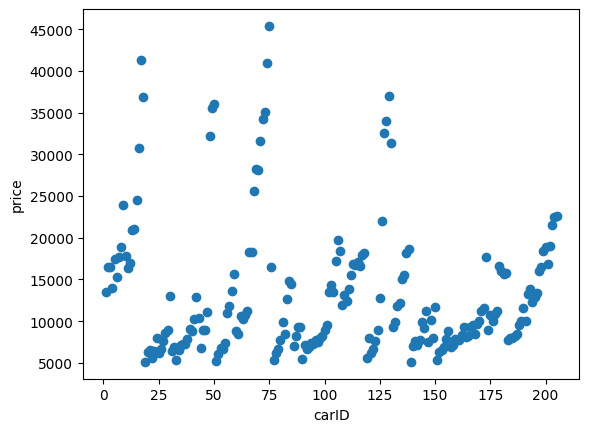

In [11]:
X=df["car_ID"]
Y=df["price"]
plt.scatter(X,Y)
plt.xlabel("carID")
plt.ylabel("price")

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test= train_test_split(X,Y , test_size=0.4, random_state=23)


In [19]:
X_train = np.array(X_train).reshape(-1,1)
X_train.flatten()

array([ 62,  87, 125, 194, 193, 114,   3, 155, 103, 110, 156, 188, 134,
        10,  17, 170,   8,   6, 122, 152, 102, 142, 197,  90,  55,  89,
        97, 149, 115, 139, 118, 182, 140,  35,  96, 200, 105,  34, 161,
        86,  51, 157,  94,   5,  39,  43,  30, 107,  24, 169, 181, 168,
        38,  27, 187,   2,  12, 101, 166, 137, 203,  69, 160, 189,  72,
        44,  63,  28,  67,  71,  81,  79, 164, 143, 159,  99,  33, 195,
       150,   1,  95, 201,  23,  61,  14,  57,  36, 126,  26, 119, 104,
        16, 172, 117, 130,  66,  37, 144, 199, 162, 148,  58, 198,  80,
        42,  49,  22, 192,  50,  13, 174, 124,   7, 180, 154,  91,  40,
        92,  32, 183, 202,  41,  84])

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
c=lr.intercept_
print(c)
m=lr.coef_
print(m)

14160.22417527925
[-13.93496427]


Text(0, 0.5, 'price')

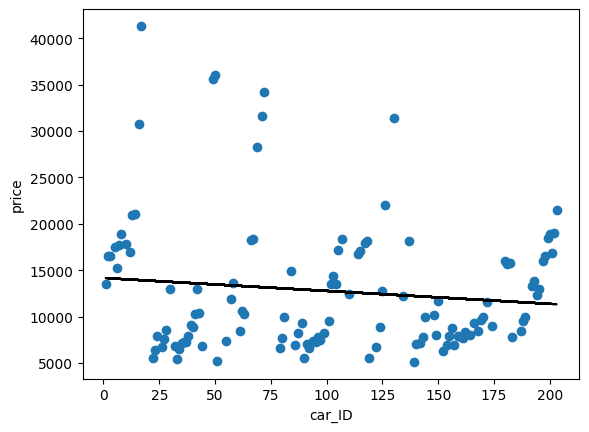

In [32]:
Y_pred_train=m*X_train+c
Y_pred_train1= lr.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred_train1, color='black')
plt.xlabel("car_ID")
plt.ylabel("price")

In [27]:
X_test = np.array(X_test).reshape(-1,1)
X_test
X_test.flatten()

array([ 75,  52,  47,  15,  19,  20, 175, 196, 190, 100, 184,  78,  74,
       205, 136, 186, 153, 178, 121, 147, 204,  68,  73,  53, 167,  25,
       111,  85, 135,  83,  88, 173,  31, 177, 171,  45, 179, 145, 163,
         9, 120,  21, 158, 123,  11, 133,  48, 132, 129,  29,  59,  93,
        98, 112, 127,  65,  18,  76, 109,  77, 146, 176,  56, 113, 191,
         4, 141, 106,  70, 131,  46,  60,  82, 185,  64,  54, 138, 151,
       128, 165, 116, 108])

In [28]:
Y_pred_test1= lr.predict(X_test)
Y_pred_test1.flatten()


array([13115.10185522, 13435.60603337, 13505.28085471, 13951.19971127,
       13895.4598542 , 13881.52488993, 11721.60542847, 11428.97117885,
       11512.58096446, 12766.72774853, 11596.19075006, 13073.29696242,
       13129.03681949, 11303.55650045, 12265.0690349 , 11568.32082153,
       12028.17464236, 11679.80053567, 12474.09349891, 12111.78442796,
       11317.49146471, 13212.64660509, 13142.97178375, 13421.6710691 ,
       11833.08514261, 13811.85006859, 12613.44314159, 12975.75221254,
       12279.00399917, 13003.62214108, 12933.94731974, 11749.47535701,
       13728.24028299, 11693.73549994, 11777.34528554, 13533.15078324,
       11665.8655714 , 12139.6543565 , 11888.82499968, 14034.80949687,
       12488.02846318, 13867.58992566, 11958.49982102, 12446.22357038,
       14006.93956834, 12306.87392771, 13491.34589044, 12320.80889197,
       12362.61378478, 13756.11021152, 13338.0612835 , 12864.2724984 ,
       12794.59767707, 12599.50817732, 12390.48371331, 13254.45149789,
      

Text(0, 0.5, 'price')

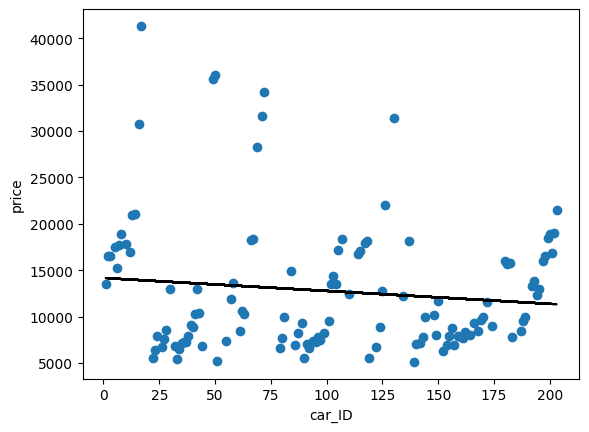

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred_train1, color='black')
plt.xlabel("car_ID")
plt.ylabel("price")

Fast food


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df2=pd.read_csv("fastfood.csv")
df2

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,0
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,0
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,0
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,0


In [37]:
df2.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
Healthy          0
dtype: int64

In [38]:
columns_to_fill = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']
df2[columns_to_fill] = df2[columns_to_fill].fillna(df2[columns_to_fill].mean())

In [39]:
df2.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
Healthy        0
dtype: int64